# Gradient Descent: 2 parameters, $ \theta_0 $ and $ \theta_1 $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
%matplotlib inline

### $ \vec{x} $

In [2]:
x = np.linspace(-5, 7)

### Used to generate samples

In [3]:
def generate_samples(samples, x):
    return np.array([[(7*n) - np.random.normal(21, 3) for n in x] for _ in range(samples)])

### $ \matrix{Y} $

In [4]:
Y = generate_samples(3,x)

In [5]:
Y.shape

(3, 50)

### Plotting all 3 samples

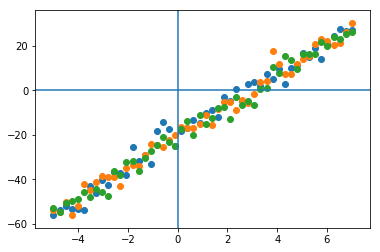

In [6]:
plt.scatter(x, Y[0]);
plt.scatter(x, Y[1]);
plt.scatter(x, Y[2]);
plt.axhline(0);
plt.axvline(0);

### Gradient Descent
- Starting at `m=0.1` and `b=0.`
- Going for 50 epochs
- Printing results every 10 epochs

In [7]:
m = 0.1
b = 0.1
for e in range(50):
    # loss - mse for full batch of 3 samples
    mse_samples = ((Y - ((m*x) + b)) ** 2).mean(axis=1)
    mse = mse_samples.mean()
    
    # compute the gradients from all 3 samples
    # instead of using "sum * 1/n", i'm using "sum * 1/2n" to make the "2" disappear in the equation
    m_grad = ((Y - ((m*x) + b)) * (-x)).mean()
    b_grad = ((Y - ((m*x) + b)) * (-1)).mean()
    
    # apply the learning rate to the gradients
    m_delta = 0.1 * m_grad
    b_delta = 0.1 * b_grad
    
    # subtract the delta from the weight and bias term
    m -= m_delta
    b -= b_delta
    
    # only print out every 10 epochs
    if e % 10 == 0:
        print("samples: {} mse: {:.2f} m: {:.2f} b: {:.2f}".format(mse_samples, mse, m, b))

samples: [791.36649857 788.27416962 799.44717544] mse: 793.03 m: 7.31 b: -1.28
samples: [67.65536219 68.14348346 76.07334465] mse: 70.62 m: 6.40 b: -13.31
samples: [19.58839829 17.75447938 20.69353204] mse: 19.35 m: 6.76 b: -17.84
samples: [13.37723057 10.65905602 11.69769972] mse: 11.91 m: 6.89 b: -19.56
samples: [12.76511714  9.71025649 10.02530707] mse: 10.83 m: 6.95 b: -20.22


### Plotting loss as a function of `m` and `b`

In [8]:
rng = range(-50, 50)
outer = []
for m in rng:
    inner = []
    for b in rng:
        loss = ((Y - ((m*x) + b)) ** 2).mean()
        inner.append(loss)
    outer.append(inner)

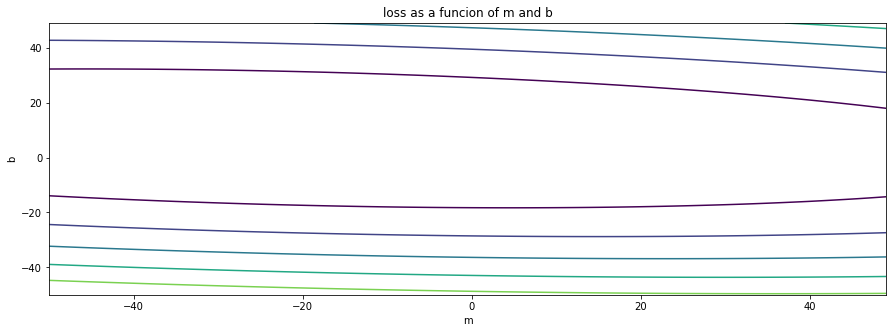

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
ax.contour(rng, rng, outer);
ax.set_xlabel('m');
ax.set_ylabel('b');
ax.set_title('loss as a funcion of m and b');